In [232]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

In [301]:
hitters = pd.read_csv('Hitters.csv')

In [302]:
hitters = hitters.dropna(subset=['Salary'])

In [303]:
hitters['target'] = np.log(hitters.Salary)

In [304]:
hitters.head()

Unnamed: 0  AtBat  Hits  HmRun  Runs  RBI  Walks  Years  CAtBat  \
1        -Alan Ashby    315    81      7    24   38     39     14    3449   
2       -Alvin Davis    479   130     18    66   72     76      3    1624   
3      -Andre Dawson    496   141     20    65   78     37     11    5628   
4  -Andres Galarraga    321    87     10    39   42     30      2     396   
5   -Alfredo Griffin    594   169      4    74   51     35     11    4408   

   CHits    ...     CRBI  CWalks  League  Division PutOuts Assists  Errors  \
1    835    ...      414     375       N         W     632      43      10   
2    457    ...      266     263       A         W     880      82      14   
3   1575    ...      838     354       N         E     200      11       3   
4    101    ...       46      33       N         E     805      40       4   
5   1133    ...      336     194       A         W     282     421      25   

   Salary  NewLeague    target  
1   475.0          N  6.163315  
2   480.0          A  6.173786  
3   500.0          N  6.214608  
4    91.5          N  4.516339  
5   750.0          A  6.620073  

[5 rows x 22 columns]

In [305]:
hitters.columns

Index(['Unnamed: 0', 'AtBat', 'Hits', 'HmRun', 'Runs', 'RBI', 'Walks', 'Years',
       'CAtBat', 'CHits', 'CHmRun', 'CRuns', 'CRBI', 'CWalks', 'League',
       'Division', 'PutOuts', 'Assists', 'Errors', 'Salary', 'NewLeague',
       'target'],
      dtype='object')

In [308]:
feats = ['Hits',
        'Walks',
        'Runs',
        'Years',
        'RBI',
        'PutOuts',
         'HmRun',
         'Assists',
         'Errors']



# Primera parte 

In [311]:
testErrors = []
trainningErrors = []
CVs = []
testErrorserr = []
trainningErrorserr = []
CVserr = []
all_test,all_train= train_test_split(hitters,test_size = 0.5)
print(len(all_train))
print(len(all_test))
for i in range(2,11):

    cvScores = np.zeros(6)
    
    testScores = np.zeros(6)
    
    trainningScores = np.zeros(6)
    
    for j in range(6):
        XS = np.array_split(all_train[feats], 6)
        YS = np.array_split(all_train.target,6)
        
        testx = XS.pop(j)
        testy = YS.pop(j)
        
        
        all_temp_train = pd.concat(XS)
        all_temp_target = np.concatenate(YS)
        
        clf = tree.DecisionTreeRegressor(max_leaf_nodes=i)
        clf.fit(all_temp_train,all_temp_target)
        
        cvScores[j]=mean_squared_error(clf.predict(testx),testy)
        
        testScores[j]=mean_squared_error(all_test.target,clf.predict(all_test[feats]))
        trainningScores[j]=mean_squared_error(all_temp_target,clf.predict(all_temp_train))
        
        
    CVs.append(np.mean(cvScores))
    testErrors.append(np.mean(testScores))
    trainningErrors.append(np.mean(trainningScores))
    CVserr.append(np.std(cvScores))
    testErrorserr.append(np.std(testScores))
    trainningErrorserr.append(np.std(trainningScores))


132
131


Text(0,0.5,'MSE')

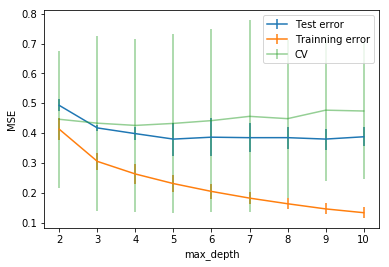

In [318]:
xs = range(2,11)
plt.errorbar(xs,testErrors,label = 'Test error',yerr=testErrorserr)
plt.errorbar(xs,trainningErrors,label = 'Trainning error',yerr=trainningErrorserr)
plt.errorbar(xs,CVs,label = 'CV',yerr=CVserr,alpha=0.5)
plt.legend()
plt.xlabel('max_depth')
plt.ylabel('MSE')

# Segunda parte


In [319]:
cleveland = pd.read_csv('processed.cleveland.data',header=None)
labels = [  'age',
            'sex', 
            'cpx',     
            'trestbps', 
            'chol',  
            'fbs', 
            'restecg',
            'thalach', 
            'exang', 
            'oldpeak', 
            'slope',
            'ca', 
            'thal',
            'num']
cleveland.columns = labels
cleveland['target'] = (cleveland.num)
cleveland.head()

age  sex  cpx  trestbps   chol  fbs  restecg  thalach  exang  oldpeak  \
0  63.0  1.0  1.0     145.0  233.0  1.0      2.0    150.0    0.0      2.3   
1  67.0  1.0  4.0     160.0  286.0  0.0      2.0    108.0    1.0      1.5   
2  67.0  1.0  4.0     120.0  229.0  0.0      2.0    129.0    1.0      2.6   
3  37.0  1.0  3.0     130.0  250.0  0.0      0.0    187.0    0.0      3.5   
4  41.0  0.0  2.0     130.0  204.0  0.0      2.0    172.0    0.0      1.4   

   slope   ca thal  num  target  
0    3.0  0.0  6.0    0       0  
1    2.0  3.0  3.0    2       2  
2    2.0  2.0  7.0    1       1  
3    3.0  0.0  3.0    0       0  
4    1.0  0.0  3.0    0       0

In [320]:
cleveland.ca = list(map(lambda x : float(x) if x!='?' else None,cleveland.ca))
cleveland.thal = list(map(lambda x : float(x) if x!='?' else None,cleveland.thal))
cleveland = cleveland.dropna()

In [321]:
feats = cleveland.columns[:-2]
print(feats)

Index(['age', 'sex', 'cpx', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal'],
      dtype='object')


In [322]:
testErrors = []
trainningErrors = []
CVs = []
testErrorserr = []
trainningErrorserr = []
CVserr = []
all_test,all_train= train_test_split(cleveland,test_size = 0.5)
print(len(all_train))
print(len(all_test))
for i in range(2,11):
    
    cvScores = np.zeros(6)
    
    testScores = np.zeros(6)
    
    trainningScores = np.zeros(6)
    
    for j in range(6):
        XS = np.array_split(all_train[feats], 6)
        YS = np.array_split(all_train.target,6)
        
        testx = XS.pop(j)
        testy = YS.pop(j)
        
        
        all_temp_train = pd.concat(XS)
        all_temp_target = np.concatenate(YS)
        
        clf = tree.DecisionTreeRegressor(max_leaf_nodes=i)
        clf.fit(all_temp_train,all_temp_target)
        
        cvScores[j]=mean_squared_error(clf.predict(testx),testy)
        
        testScores[j]=mean_squared_error(all_test.target,clf.predict(all_test[feats]))
        trainningScores[j]=mean_squared_error(all_temp_target,clf.predict(all_temp_train))
        
        
    CVs.append(np.mean(cvScores))
    testErrors.append(np.mean(testScores))
    trainningErrors.append(np.mean(trainningScores))
    CVserr.append(np.std(cvScores))
    testErrorserr.append(np.std(testScores))
    trainningErrorserr.append(np.std(trainningScores))


149
148


Text(0,0.5,'MSE')

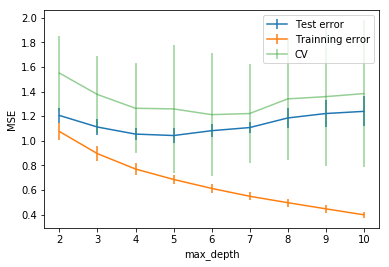

In [323]:
xs = range(2,11)
plt.errorbar(xs,testErrors,label = 'Test error',yerr=testErrorserr)
plt.errorbar(xs,trainningErrors,label = 'Trainning error',yerr=trainningErrorserr)
plt.errorbar(xs,CVs,label = 'CV',yerr=CVserr,alpha=0.5)
plt.legend()
plt.xlabel('max_depth')
plt.ylabel('MSE')

# Parte en clase

In [157]:
oj = pd.read_csv('OJ.csv')
print(oj.shape)

(1070, 19)


In [158]:
oj.head()

Unnamed: 0 Purchase  WeekofPurchase  StoreID  PriceCH  PriceMM  DiscCH  \
0           1       CH             237        1     1.75     1.99    0.00   
1           2       CH             239        1     1.75     1.99    0.00   
2           3       CH             245        1     1.86     2.09    0.17   
3           4       MM             227        1     1.69     1.69    0.00   
4           5       CH             228        7     1.69     1.69    0.00   

   DiscMM  SpecialCH  SpecialMM   LoyalCH  SalePriceMM  SalePriceCH  \
0     0.0          0          0  0.500000         1.99         1.75   
1     0.3          0          1  0.600000         1.69         1.75   
2     0.0          0          0  0.680000         2.09         1.69   
3     0.0          0          0  0.400000         1.69         1.69   
4     0.0          0          0  0.956535         1.69         1.69   

   PriceDiff Store7  PctDiscMM  PctDiscCH  ListPriceDiff  STORE  
0       0.24     No   0.000000   0.000000           0.24      1  
1      -0.06     No   0.150754   0.000000           0.24      1  
2       0.40     No   0.000000   0.091398           0.23      1  
3       0.00     No   0.000000   0.000000           0.00      1  
4       0.00    Yes   0.000000   0.000000           0.00      0

In [159]:
oj= oj.drop(['Store7'],axis=1)


In [160]:
oj['target'] = list(map(lambda x:1 if x=='CH' else 0, oj.Purchase))

In [161]:
feats= oj.columns[2:-1]
print(feats)

Index(['WeekofPurchase', 'StoreID', 'PriceCH', 'PriceMM', 'DiscCH', 'DiscMM',
       'SpecialCH', 'SpecialMM', 'LoyalCH', 'SalePriceMM', 'SalePriceCH',
       'PriceDiff', 'PctDiscMM', 'PctDiscCH', 'ListPriceDiff', 'STORE'],
      dtype='object')


In [221]:
def integrar(y,x):
    
    x = x.tolist()
    y = y.tolist()
    x.reverse()
    y.reverse()
    
    suma=0
#     print(x)
    for i in range(len(x)-1):
#         print(suma)
        dx = x[i+1]-x[i]
        suma+=dx*y[i+1]
    return suma
        

(0.0, 1.0)

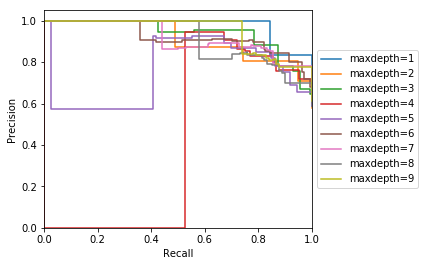

In [223]:
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt
from sklearn.utils.fixes import signature
from scipy import integrate

fig = plt.figure()
ax = plt.subplot(111)


# Shrink current axis by 20%
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])

# Put a legend to the right of the current axis

areas  = []
for i in range(1,10):
    oj = oj.sample(frac=1)
    all_train, all_test = train_test_split(oj,test_size=0.25)
    clf = tree.DecisionTreeClassifier(max_depth=i)
    clf.fit(all_train[feats],all_train.target)
    
    
    precision, recall, _ = precision_recall_curve(all_test.target, clf.predict_proba(all_test[feats])[:,1])
#     print(recall)
    

    ax.step(recall, precision,label='maxdepth={}'.format(i))
    areas.append(integrar(precision,recall))

ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])


Text(0,0.5,'Area under precision-recall curve')

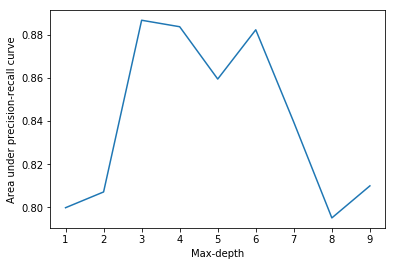

In [225]:
plt.plot(range(1,10),areas)
plt.xlabel('Max-depth')
plt.ylabel('Area under precision-recall curve')

El área bajo la curva de precision-recall se maximiza cuando el max-depth del arbol es 3. Así pues, **el mejor árbol es el que tiene max-depth = 3.**